In [211]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score, f1_score

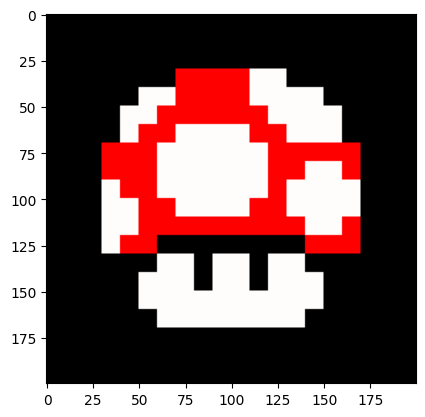

In [126]:
img = cv2.imread("../../data/mushroom.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
def objective_function(img, ind):
    ind = cv2.circle(img, (ind[0],ind[1]), ind[2], (ind[]), thickness)
    return f1_score(img, ind, average='micro')

objective_function(img, [100,100, 50, 255,0,0,0.5]) #X,Y,r,R,G,B,alpha

# Scipy Differential Evolution

In [214]:
from scipy.optimize import differential_evolution

In [222]:
w,h,c = img.shape

bounds = [
    [0,w],# x
    [0,h], # y
    [3,(w+h)/4], # radius
    [0,255], # R
    [0,255], # G
    [0,255], # B
    [0,255], # alpha
]

In [223]:
res = differential_evolution(objective_function, bounds, args = (img))
res

RuntimeError: The map-like callable must be of the form f(func, iterable), returning a sequence of numbers the same length as 'iterable'

# Project

## Recommendation

Work along *scipy*. The idea is to make the project behave as scipy does.

Start with something small and easy. With few details and an image of 200 x 200 approx.

## Individual

The individual is recommended to have:

- **x** - x coordinate value of the circle.

- **y** - y coordinate value of the circle.

- **r** - Radius of the circle, recommended value is (3 or something like that to half the image size).

- **Colors** - RGBA

    - Alpha is optional.

## How it works

This algorithm has to execute itself as many times as circles the image has.

Each execution will add a new circle that minimizes the difference between the image we're building and the target one.